Importing Modules:

In [1]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

Importing Train and Test files:

In [2]:
train = pd.read_excel(r'C:\Users\M Ramani Priya\Desktop\DATA_TRAIN.xlsx')
test = pd.read_excel(r'C:\Users\M Ramani Priya\Desktop\DATA_TEST.xlsx')

Data Exploration:

In [3]:
print('The columns in Data_Train are',train.columns)

The columns in Data_Train are Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [4]:
print('The columns in Data_Test are',test.columns)

The columns in Data_Test are Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')


In [5]:
train.shape,test.shape

((6019, 12), (1234, 11))

Analysing duplicate values:

In [6]:
train.duplicated().sum(),test.duplicated().sum()

(0, 1)

In [7]:
train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [8]:
train.tail(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6009,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,19.75
6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,3.20
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.0,4.75
6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,9.48
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.83
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [10]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [11]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

Data Preprocessing:

In [12]:
train.insert(1,'Car_Brand',True)
train.insert(2,'Car_Model',True)
train.insert(3,'Car_Version',True)
test.insert(1,'Car_Brand',True)
test.insert(2,'Car_Model',True)
test.insert(3,'Car_Version',True)

In [13]:
train['Car_Brand'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[:1]))
test['Car_Brand'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[:1]))
train['Car_Model'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2]))
test['Car_Model'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2]))
train['Car_Version'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[2:]))
test['Car_Version'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[2:]))

ANALYSING DATA:

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')


Text(0.5, 1, 'Heat Map')

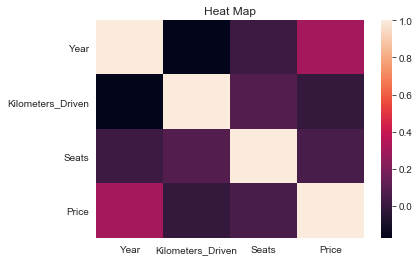

In [14]:
correlation=train.corr()
print(correlation.columns),
ax=sns.heatmap(correlation)
plt.title('Heat Map')

Identifying Outliers:

In [15]:
train['Kilometers_Driven']

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [16]:
print(min(train['Kilometers_Driven']),max(train['Kilometers_Driven']))


171 6500000


In [17]:
train['no_of_cars1']=train.groupby('Kilometers_Driven')['Kilometers_Driven'].transform('count')
train['no_of_cars1']

0       42
1       31
2       28
3       12
4        1
        ..
6014     1
6015    42
6016    60
6017    28
6018    29
Name: no_of_cars1, Length: 6019, dtype: int64

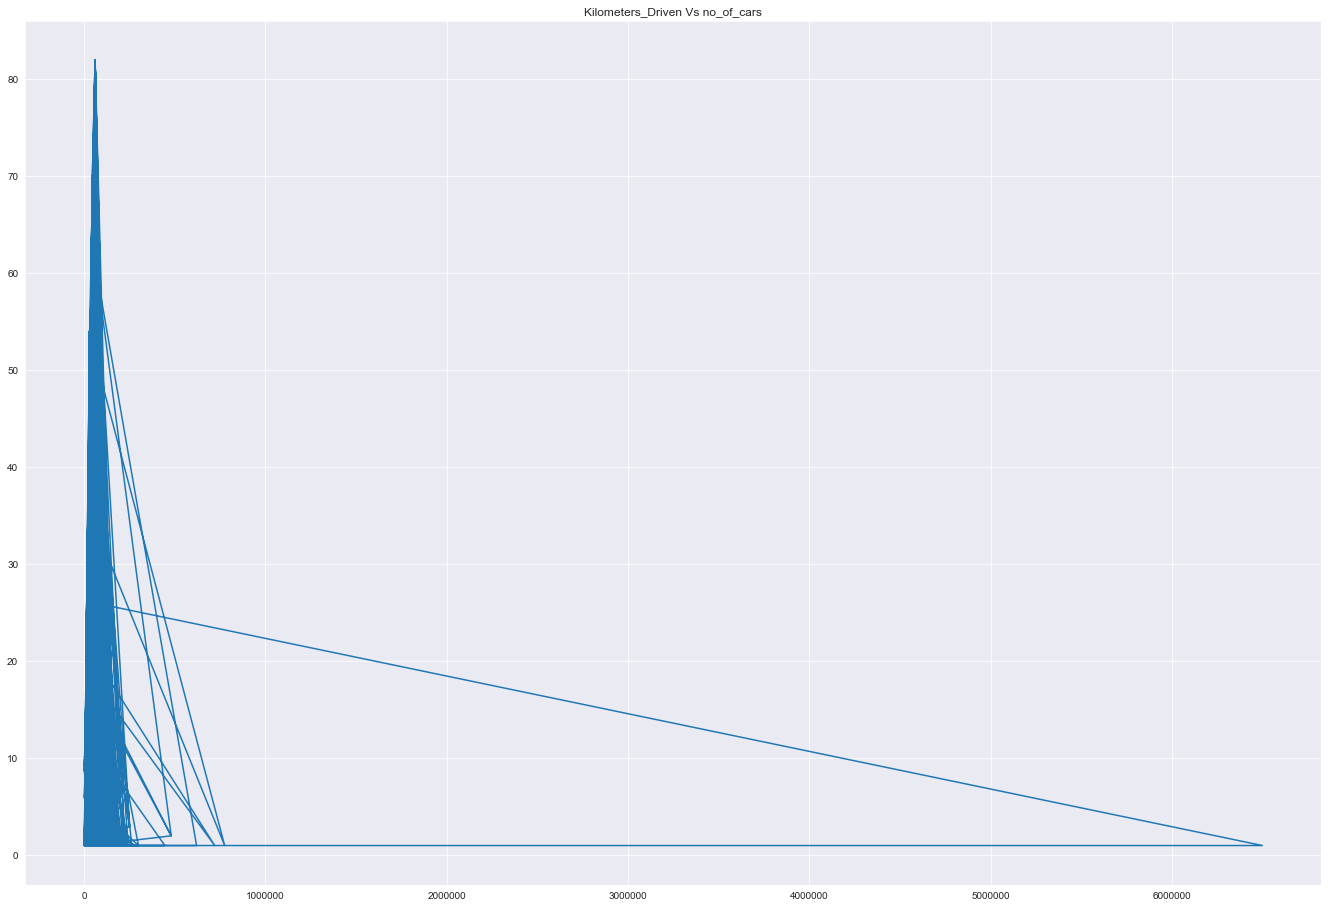

In [18]:
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
#ax.bar(train['Kilometers_Driven'],train['no_of_cars1'],width=2.0,color='b')
#plt.show()
plt.plot(train['Kilometers_Driven'],train['no_of_cars1'])
plt.title('Kilometers_Driven Vs no_of_cars')
plt.show()

In [19]:
train[train['Kilometers_Driven']>600000]

,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Skoda,Octavia,Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.5,1
358,Hyundai i10 Magna 1.2,Hyundai,i10,Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.7,1
1860,Volkswagen Vento Diesel Highline,Volkswagen,Vento,Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.9,1
2328,BMW X5 xDrive 30d M Sport,BMW,X5,xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,1


from the above graph and table, the number of cars that were driven greater than 650000 kiometers are less and those that were driven greater than 650000 kms doesn't tally with the data of same branded cars purchased in same year. 

In [20]:
train[train['Kilometers_Driven']<999]

,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1
1361,Maruti Alto 800 2016-2019 VXI,Maruti,Alto,800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.60,1
5606,Maruti Wagon R ZXI AMT 1.2,Maruti,Wagon,R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.25,1


Relation between price and Kilometers driven:

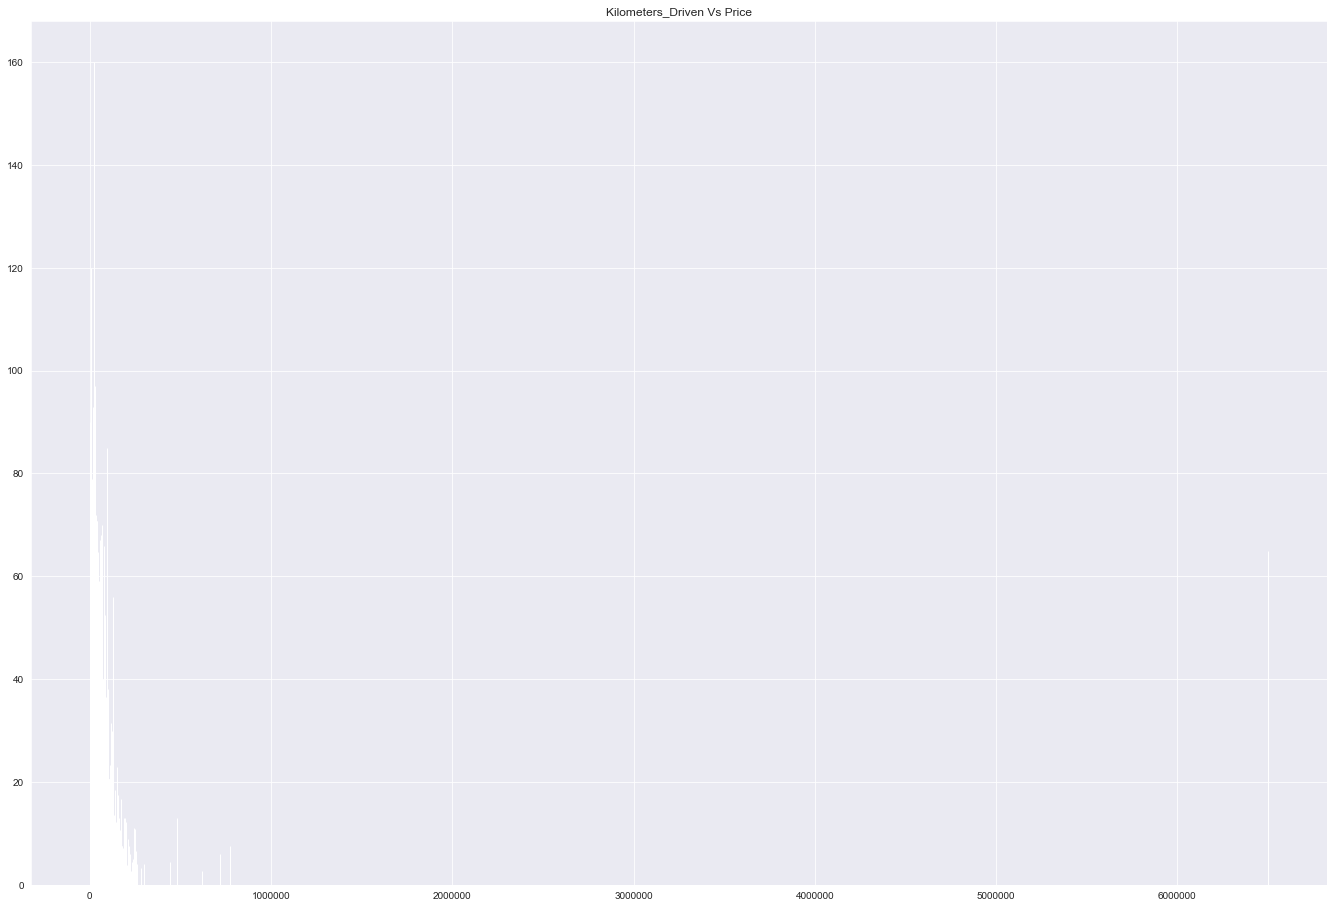

In [21]:
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
ax.bar(train['Kilometers_Driven'],train['Price'],width=2.0,color='b')
plt.title('Kilometers_Driven Vs Price')
plt.show()

As the kilometers driven by a car are increasing, the price of the car is decreasing.

In [22]:
train['no_of_cars3']=train.groupby('Fuel_Type')['Fuel_Type'].transform('count')
train['no_of_cars3']

0         56
1       3205
2       2746
3       3205
4       3205
        ... 
6014    3205
6015    3205
6016    3205
6017    2746
6018    3205
Name: no_of_cars3, Length: 6019, dtype: int64

In [23]:
print(train['Fuel_Type'].unique())
train[train['no_of_cars3']==min(train['no_of_cars3'])]

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3
4446,Mahindra E Verito D4,Mahindra,E,Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,61,2
4904,Toyota Prius 2009-2016 Z4,Toyota,Prius,2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,20,2


The number of cars having the fuel type as electric are low in number and have no information about mileage.

In [24]:
train[train['Fuel_Type']=='Electric']

,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3
4446,Mahindra E Verito D4,Mahindra,E,Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,61,2
4904,Toyota Prius 2009-2016 Z4,Toyota,Prius,2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,20,2


In [25]:
train['no_of_cars2']=train.groupby('Car_Brand')['Car_Brand'].transform('count')
train['no_of_cars2']

0       1211
1       1107
2        608
3       1211
4        236
        ... 
6014    1211
6015    1107
6016     272
6017    1211
6018     121
Name: no_of_cars2, Length: 6019, dtype: int64

In [26]:
min(train['no_of_cars2'])

1

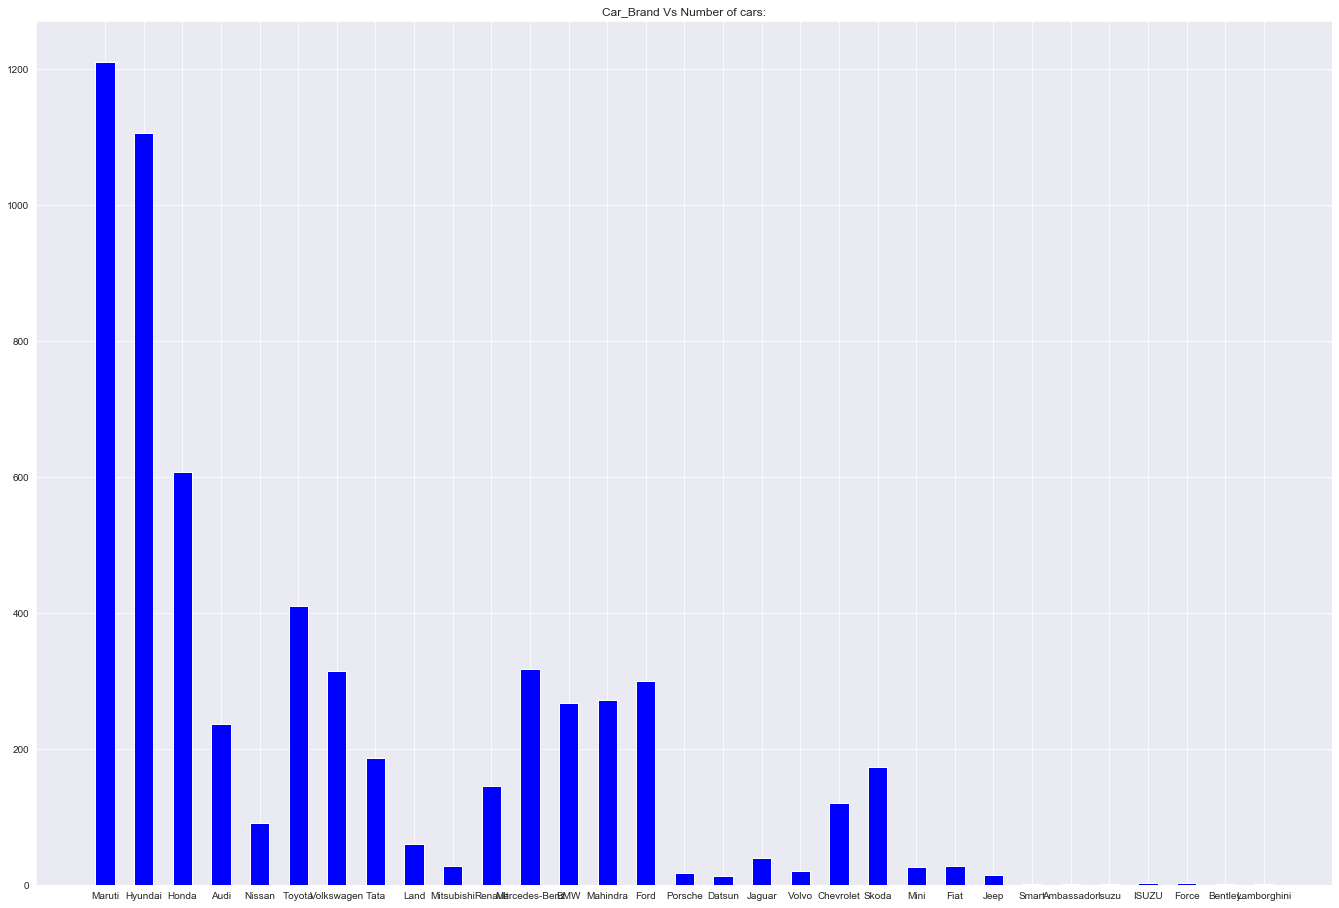

In [27]:
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
ax.bar(train['Car_Brand'],train['no_of_cars2'],width=0.5,color='b')
plt.title('Car_Brand Vs Number of cars:')
plt.show()

In [28]:
train[train['Name']==('Force One LX ABS 7 Seating')]


,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3,no_of_cars2
5182,Force One LX ABS 7 Seating,Force,One,LX ABS 7 Seating,Kolkata,2014,41000,Diesel,Manual,First,17.0 kmpl,2149 CC,139.07 bhp,7.0,8.0,31,3205,3


In [29]:
train[train['Name']==('Smart Fortwo CDI AT')]


,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3,no_of_cars2
915,Smart Fortwo CDI AT,Smart,Fortwo,CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,null bhp,2.0,3.0,5,3205,1


In [30]:
train[train['Name']==('Force One LX 4x4')]


,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3,no_of_cars2
4997,Force One LX 4x4,Force,One,LX 4x4,Chennai,2014,50000,Diesel,Manual,First,17.0 kmpl,2200 CC,139.01 bhp,7.0,12.0,61,3205,3
5206,Force One LX 4x4,Force,One,LX 4x4,Kolkata,2014,41000,Diesel,Manual,First,17.0 kmpl,2200 CC,139.01 bhp,7.0,8.0,31,3205,3


In [31]:
train[train['Name']==('Lamborghini Gallardo Coupe')]


,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3,no_of_cars2
5781,Lamborghini Gallardo Coupe,Lamborghini,Gallardo,Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,120.0,1,2746,1


In [32]:
train[train['Name']==('Ambassador Classic Nova Diesel')]

,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_of_cars1,no_of_cars3,no_of_cars2
1221,Ambassador Classic Nova Diesel,Ambassador,Classic,Nova Diesel,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,50,3205,1


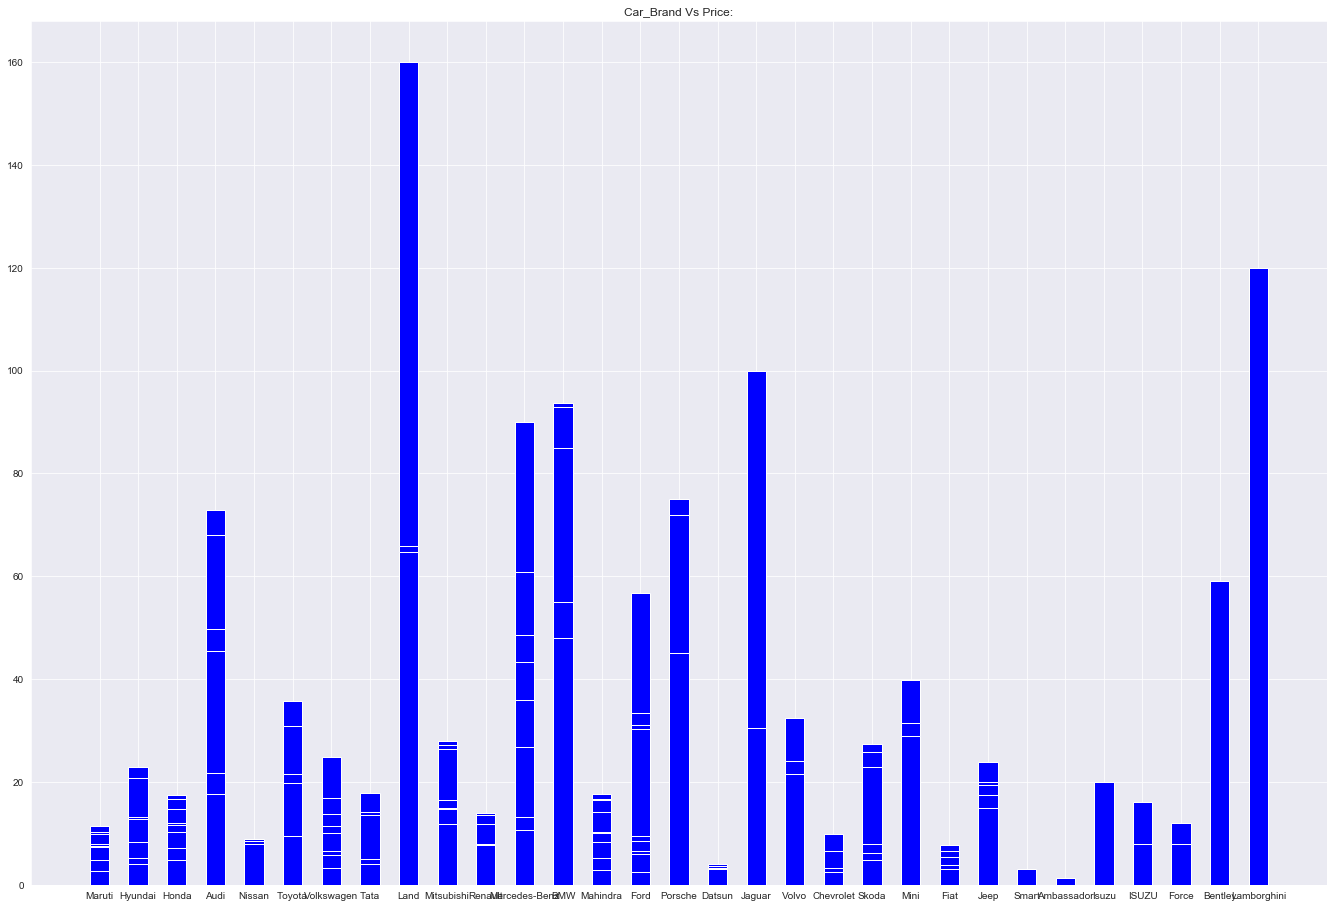

In [33]:
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
ax.bar(train['Car_Brand'],train['Price'],width=0.5,color='b')
plt.title('Car_Brand Vs Price:')
plt.show()

The number of cars and the price of depends on brand of the car and also the model of the car. The brand that is most availiable(more number of cars) has less price compared to that having less cars availiable.

In [34]:
train['Car_Age']=2020-train['Year']

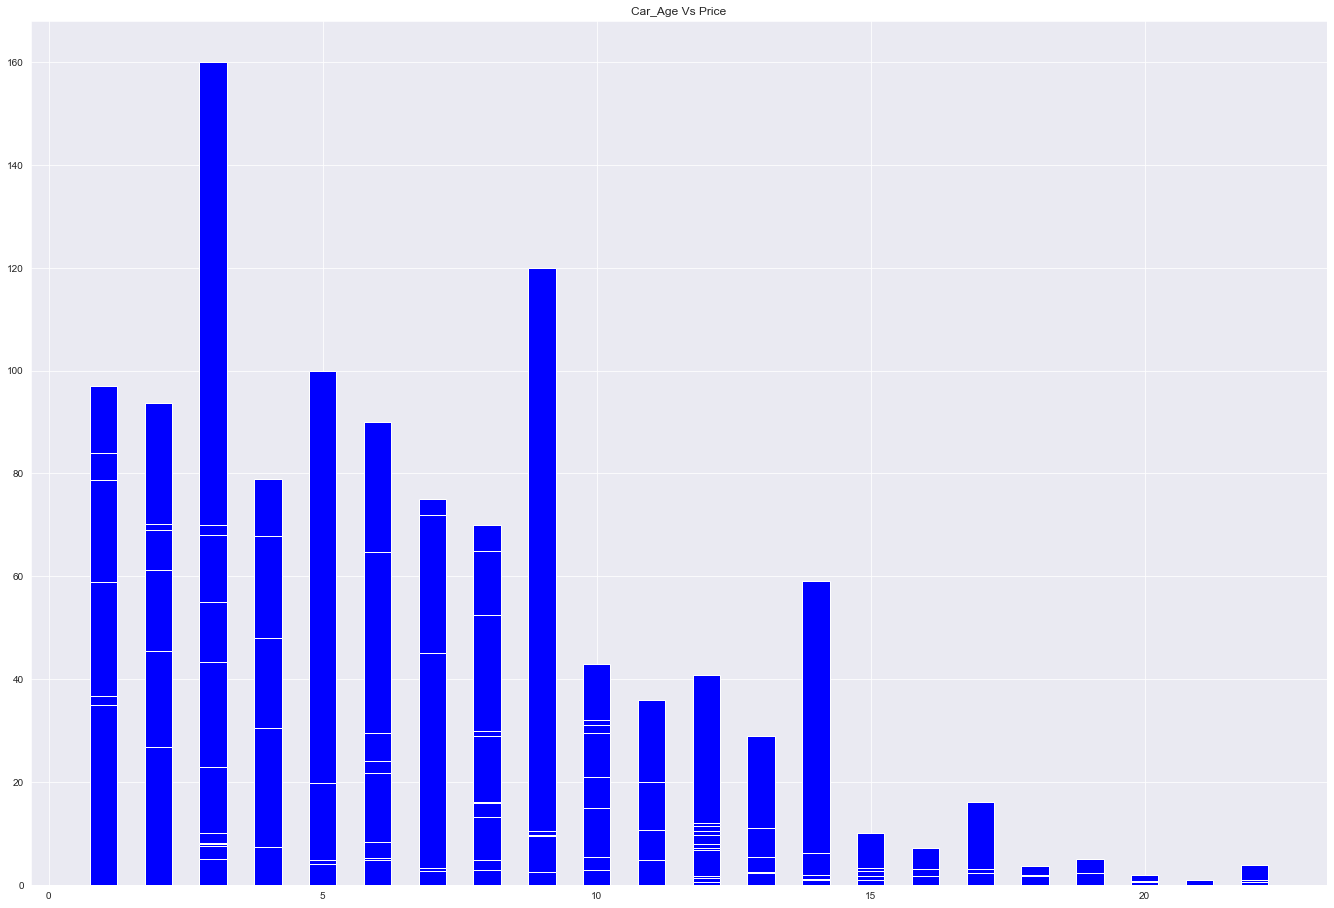

In [35]:
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
ax.bar(train['Car_Age'],train['Price'],width=0.5,color='b')
plt.title('Car_Age Vs Price')
plt.show()

The year of manufacture of a car affects its price, the older the car lesser the price.

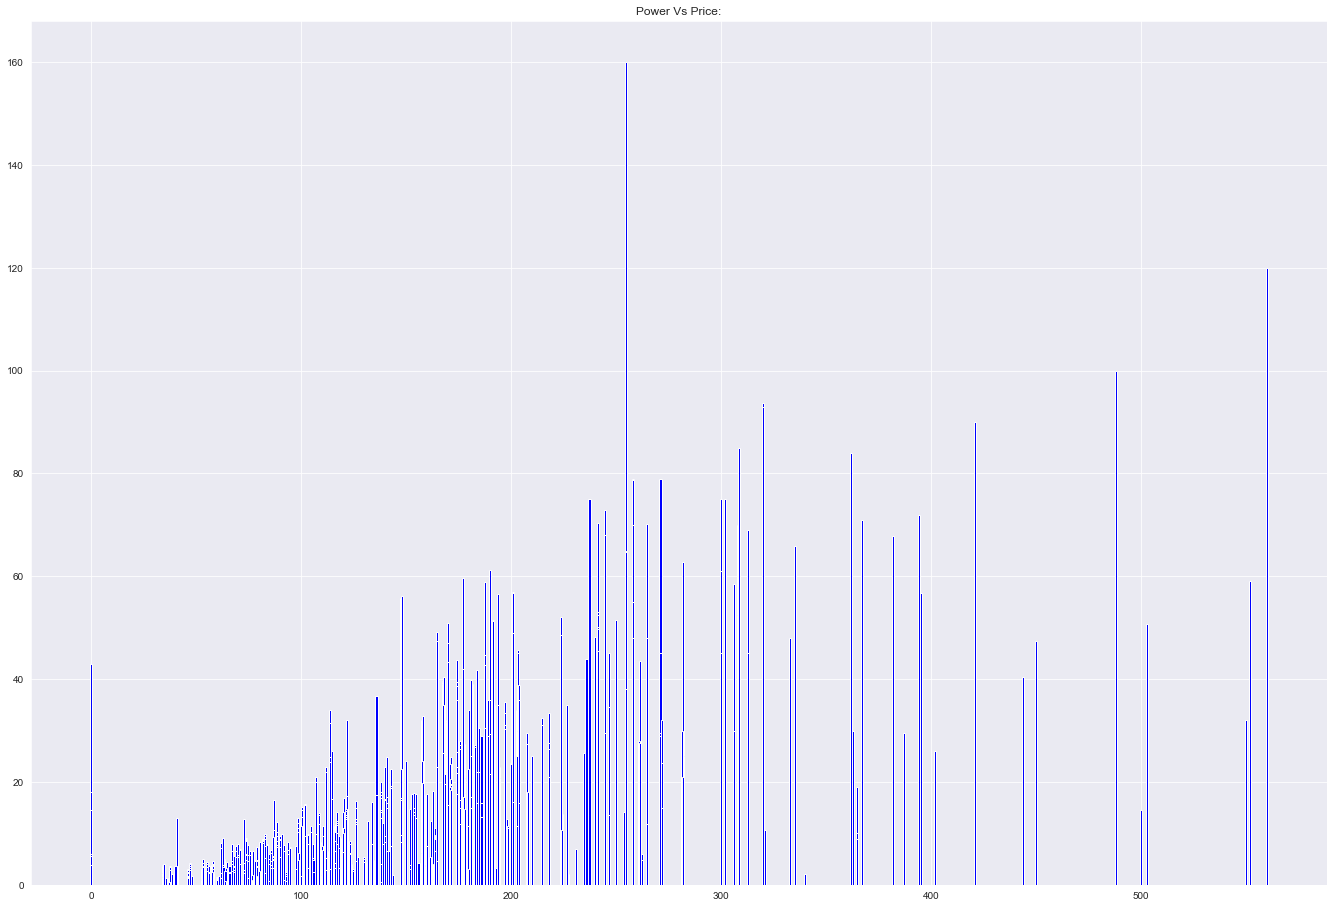

In [36]:
train['Power1'] = train['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
fig=plt.figure()
ax=fig.add_axes([0,0,3,3])
ax.bar(train['Power1'],train['Price'],width=1.0,color='b')
plt.title('Power Vs Price:')
plt.show()

Finding number of cars in a location

In [37]:
train['no_of_cars4']=train.groupby('Location')['Location'].transform('count')
train['no_of_cars4']

0       790
1       622
2       494
3       494
4       636
       ... 
6014    554
6015    413
6016    413
6017    535
6018    742
Name: no_of_cars4, Length: 6019, dtype: int64

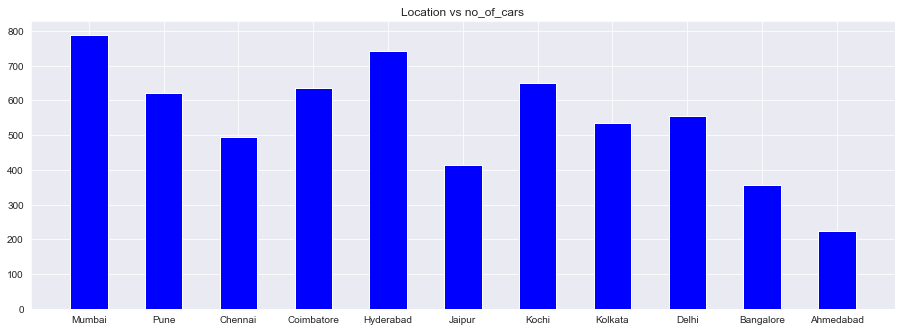

In [38]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,1])
ax.bar(train['Location'],train['no_of_cars4'],width=0.5,color='b')
plt.title('Location vs no_of_cars')
plt.show()

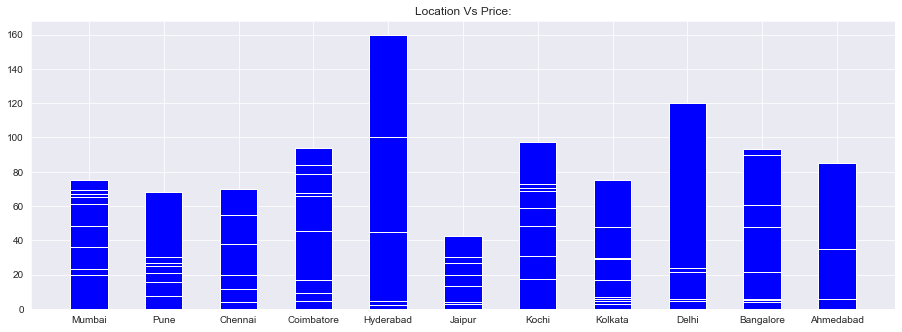

In [39]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,1])
ax.bar(train['Location'],train['Price'],width=0.5,color='b')
plt.title('Location Vs Price:')
plt.show()

The location where a car is purchased affects the price of car but also depends on the brand,model of car and other factors also.

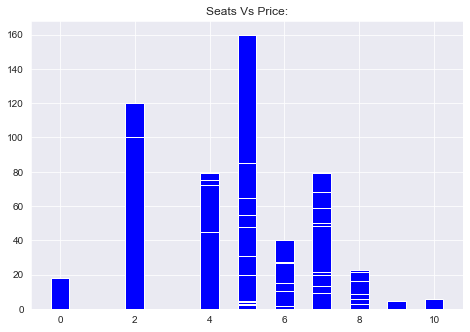

In [40]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(train['Seats'],train['Price'],width=0.5,color='b')
plt.title('Seats Vs Price:')
plt.show()

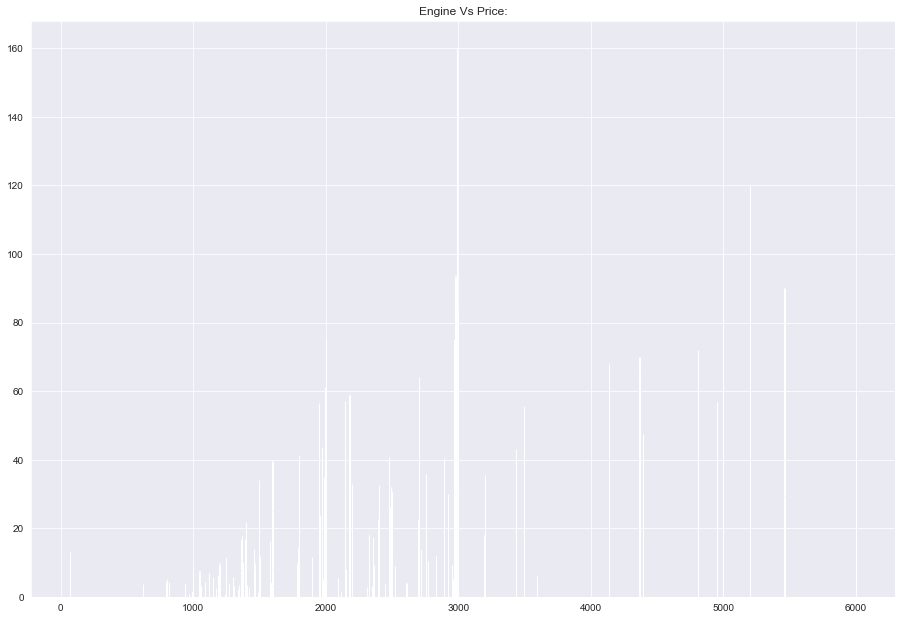

In [41]:
train['Engine'] = train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
train['Engine1'] = train.groupby(['Car_Brand']).transform(lambda x: x.fillna(x.mean()))['Engine']
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.bar(train['Engine1'],train['Price'],width=0.5,color='b')
plt.title('Engine Vs Price:')
plt.show()

The price of a car depends on the engine capacity and also on the brand, model of the car also on other factors like place of purchase, year of purchase,...

In [42]:
print(min(train['Engine1']),max(train['Engine1']))

72.0 5998.0


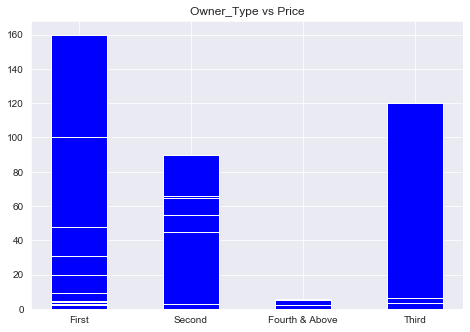

In [43]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(train['Owner_Type'],train['Price'],width=0.5,color='b')
plt.title('Owner_Type vs Price')
plt.show()

The price of a used car depends on the type of the owner, if the owner type is first it means the car is being sold as a second hand car,second for third hand car and so on.

Data Preprocessing:

In [44]:
train=train[train['Kilometers_Driven']<650000]
train=train[train['Kilometers_Driven']>999]
train=train[train['Fuel_Type']!='Electric']

len(train)

6012

In [45]:
train = train[train['Name'] != 'Ambassador Classic Nova Diesel']
train = train[train['Name'] != 'Lamborghini Gallardo Coupe']
train = train[train['Name'] != 'Force One LX 4x4']
train = train[train['Name'] != 'Force One LX ABS 7 Seating']
train = train[train['Name'] != 'Smart Fortwo CDI AT']
len(train)

6006

In [46]:
train.drop(['no_of_cars1','no_of_cars2','no_of_cars3','no_of_cars4','Engine1','Power1'],axis=1,inplace=True)


In [47]:
data=train.append(test,ignore_index=True,sort=False)

In [48]:
data.head(4)

,Name,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Maruti,Wagon,R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,1.75,10.0
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,12.50,5.0
2,Honda Jazz V,Honda,Jazz,V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,4.50,9.0
3,Maruti Ertiga VDI,Maruti,Ertiga,VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,6.00,8.0


In [49]:
data['Car_Age']=2020-data['Year']
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data['Engine'] = data['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
data['Power'] = data['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
data['Seats'] = data['Seats'].fillna(5)
data['Year'] = data['Year'].astype('category')
data['Location'] = data['Location'].astype('category')
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Owner_Type'] = data['Owner_Type'].astype('category')

In [50]:
data.isnull().sum()

Name                    0
Car_Brand               0
Car_Model               0
Car_Version             0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [51]:
data.insert(1,'Car_Brand1',True)

In [52]:
data['Car_Brand1'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

data['Engine'] = data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.mean()))['Engine']
data['Power'] = data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.mean()))['Power']

In [53]:
data['Car_Brand1']

0                Maruti Wagon
1               Hyundai Creta
2                  Honda Jazz
3               Maruti Ertiga
4                     Audi A4
                ...          
7235         Volkswagen Vento
7236          Volkswagen Polo
7237             Nissan Micra
7238          Volkswagen Polo
7239    Mercedes-Benz E-Class
Name: Car_Brand1, Length: 7240, dtype: object

In [54]:
data.isnull().sum()

Name                    0
Car_Brand1              0
Car_Brand               0
Car_Model               0
Car_Version             0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [55]:
def aggregate_functions(data):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_data = data.groupby(['Car_Brand1']).agg(agg_func)
    agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns.values]
    agg_data.reset_index(inplace=True)
    
    agg_data = pd.merge(data, agg_data, on='Car_Brand1', how='left')
    
    return agg_data

In [56]:
data=aggregate_functions(data)

In [57]:
data.head()

,Name,Car_Brand1,Car_Brand,Car_Model,Car_Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,...,Mileage,Engine,Power,Seats,Price,Car_Age,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Maruti Wagon,Maruti,Wagon,R LXI CNG,Mumbai,2010,72000,CNG,Manual,...,26.60,998.0,58.16,5.0,1.75,10,177,20.912373,66.197045,1014.147727
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,...,19.67,1582.0,126.20,5.0,12.50,5,118,17.673898,121.830508,1572.745763
2,Honda Jazz V,Honda Jazz,Honda,Jazz,V,Chennai,2011,46000,Petrol,Manual,...,18.20,1199.0,88.70,5.0,4.50,9,70,20.531429,91.521739,1281.246377
3,Maruti Ertiga VDI,Maruti Ertiga,Maruti,Ertiga,VDI,Chennai,2012,87000,Diesel,Manual,...,20.77,1248.0,88.76,7.0,6.00,8,86,20.633953,89.712093,1287.860465
4,Audi A4 New 2.0 TDI Multitronic,Audi A4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,...,15.20,1968.0,140.80,5.0,17.74,7,90,16.438111,162.041556,2024.922222


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
data_name=tf.fit_transform(data['Name'])
data_name = pd.DataFrame(data=data_name.toarray(), columns=tf.get_feature_names())
data=pd.concat([data,data_name],axis=1)

In [59]:
data.drop(['Name','Car_Brand','Car_Model','Car_Version','Car_Brand1'],axis=1,inplace=True)

Text(0.5, 1, 'Heat Map')

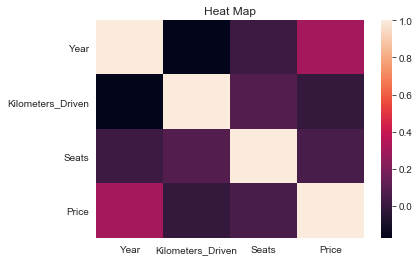

In [60]:
ax=sns.heatmap(correlation)
plt.title('Heat Map')

In [61]:
train_data = data[data['Price'].isnull()!=True]
test_df = data[data['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

In [62]:
train_data.shape,test_df.shape

((6006, 669), (1234, 668))

In [63]:
train_data['Price'] = np.log1p(train_data['Price'])

Train-Test split:

In [64]:
X=train_data.drop(labels=['Price'],axis=1)
y=train_data['Price'].values

from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.25,random_state=1)

In [65]:
X_train.shape,X_cv.shape,y_train.shape,y_cv.shape

((4504, 668), (1502, 668), (4504,), (1502,))

Building the model:

In [66]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error,r2_score


In [67]:
!pip install lightgbm
import lightgbm as lgb
#creating datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

#generating predictions of X_cv
y_pred_lgbm = lgbm.predict(X_cv) #predictions of X_cv are in y_pred_lgbm
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))
print('R2 :',r2_score(y_cv,y_pred_lgbm))

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.164109
[200]	valid_0's rmse: 0.1557
[300]	valid_0's rmse: 0.153479
[400]	valid_0's rmse: 0.152878
[500]	valid_0's rmse: 0.152654
Early stopping, best iteration is:
[519]	valid_0's rmse: 0.152532
RMSLE: 0.15253161868202922
R2 : 0.9571666251219397


objectve-Specify learning task and corr learning objective.
gbdt-Gradient Boosting Decision Tree.
num_leaves-maximum tree leaves.
max_depth-maximum tree depth.
min_data_in_leaf-minimal number of data in one leaf.
bagging_fraction-selects small part of data without resampling, speed up boosting and is used to deal with overfitting.
feature_fraction-will select 80% of features before training each tree,speed up training.

train(.) method:
params-parameters for booster.
early_stopping_rounds-initiates early stopping.

predict(.) method:
predict(data)-To make a prediction, here data is data source for prediction here test data.
RMSLE-root mean squared log error.
R2 score -R squared score.


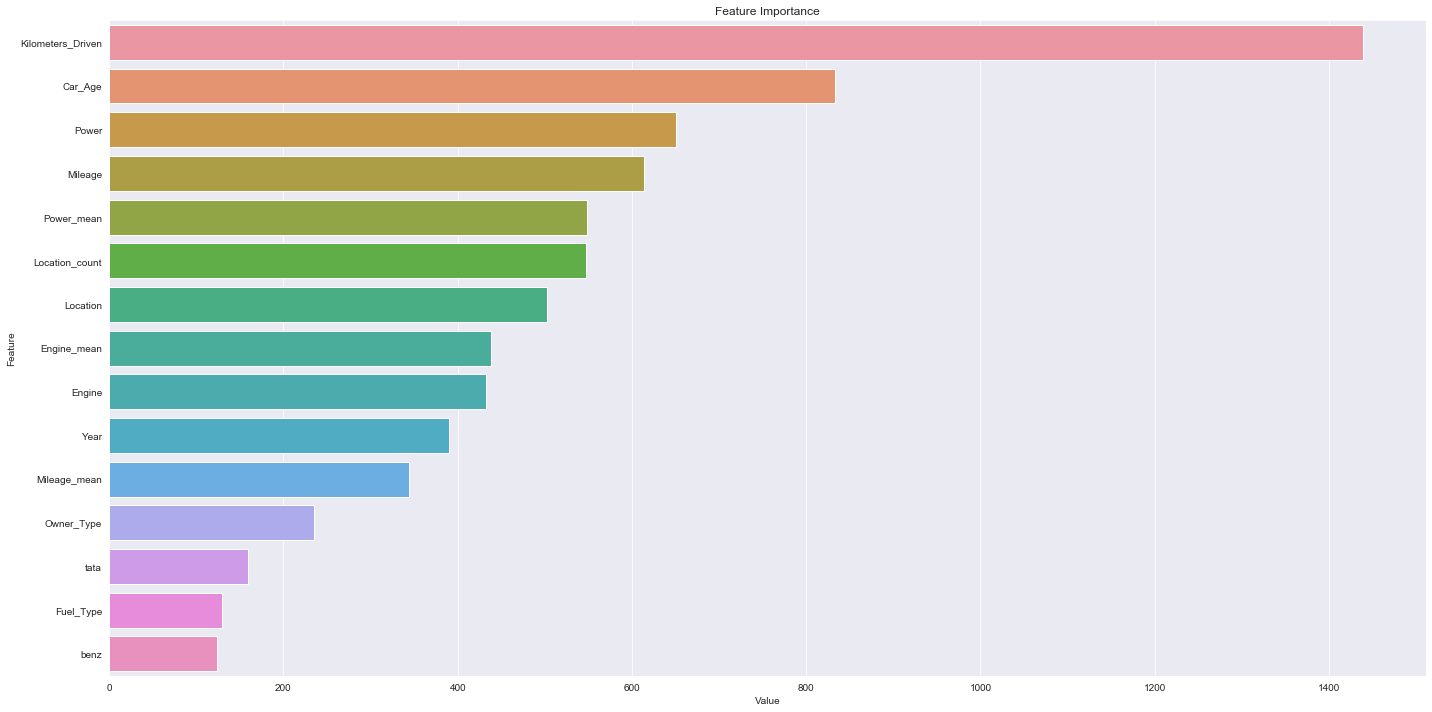

In [68]:
feature_imp=pd.DataFrame(sorted(zip(lgbm.feature_importance(),X.columns),reverse=True)[:15],
                         columns=['Value','Feature'])
plt.figure(figsize=(20,10))
sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

feature_importance

Predict on Test Set:

In [69]:
Xtest=test_df
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

#each group of train and test sets are iterated 
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }
    
    #LightGBM Regressor
    lgbm = LGBMRegressor(**param)
    
    #Fit to training data
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)
    
    #generate predictions
    y_pred_lgbm = lgbm.predict(X_test)#The predictions of X_test are in y_pred_lgbm (as well as X_cv)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    
    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))#finding RMSLE and appending it to errlgb list
    p = lgbm.predict(Xtest)#generating prediction of XTest
    
    y_pred_totlgb.append(p)#appending prediction of XTest to y_pred_totlgb list
    print('R2 Score : ',r2_score(y_test,y_pred_lgbm)) #finding R2 score

RMSLE LGBM:  0.13306078529350587
R2 Score :  0.9677761413981292
RMSLE LGBM:  0.13780629296700178
R2 Score :  0.9670114404273947
RMSLE LGBM:  0.11242563464552072
R2 Score :  0.9761627232308039
RMSLE LGBM:  0.12403870120625805
R2 Score :  0.975193489599897
RMSLE LGBM:  0.11916067128657322
R2 Score :  0.9779539394621157
RMSLE LGBM:  0.1461081790324963
R2 Score :  0.9575315821582422
RMSLE LGBM:  0.2035244779541948
R2 Score :  0.9252317734483041
RMSLE LGBM:  0.10755854409071382
R2 Score :  0.9772274444911035
RMSLE LGBM:  0.14032623889568802
R2 Score :  0.9609610760549864
RMSLE LGBM:  0.12499933308435938
R2 Score :  0.9710364223476528
RMSLE LGBM:  0.11107356496716553
R2 Score :  0.9775664967818274
RMSLE LGBM:  0.11314396562380358
R2 Score :  0.977677710087625
RMSLE LGBM:  0.12318681905758704
R2 Score :  0.9728050116580784
RMSLE LGBM:  0.1312500478375577
R2 Score :  0.9699576989946253
RMSLE LGBM:  0.1452249786820045
R2 Score :  0.963210033833227


We have used K Fold cross validation to estimate the skill of the model.
split(.) method returns each group of train and test sets.
LGBM Regressor(params) - parameters are passed

predict(data)-To make a prediction, here data is data source for prediction here test data.

In [70]:
np.mean(errlgb) #mean of the rmsle values of y_test and y_pred_lgbm

0.13152588230829537

In [71]:
lgbm_final=np.expm1(np.mean(y_pred_totlgb,0)) #generates exp(mean of y_pred_totlgb) and stores in lgbm_final

In [72]:
df_sub=pd.DataFrame(data=lgbm_final,columns=['Price']) #converts lgbm_final into a dataframe 
writer=pd.ExcelWriter('Test_Price.xlsx',engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1',index=False) #converts dataframe to an excel sheet
writer.save()

Saving the content of the final price values into new excel sheet.

In [73]:
df_sub.shape

(1234, 1)

The Price of the cars in Data_Test file:

In [74]:
df_sub

,Price
0,2.689991
1,2.953022
2,16.397162
3,3.897619
4,4.462423
...,...
1229,3.954107
1230,5.956818
1231,2.947252
1232,4.464189
